In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

D:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [5]:
model = Sequential()

model.add(Embedding(max_features, 32))

model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(input_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 [==============================] - 135s 969ms/step - loss: 0.5522 - accuracy: 0.7238 - val_loss: 0.4081 - val_accuracy: 0.8365
Epoch 2/5
137/137 [==============================] - 140s 1s/step - loss: 0.2991 - accuracy: 0.8859 - val_loss: 0.3010 - val_accuracy: 0.8765
Epoch 3/5
137/137 [==============================] - 133s 963ms/step - loss: 0.2073 - accuracy: 0.9254 - val_loss: 0.3411 - val_accuracy: 0.8575
Epoch 4/5
137/137 [==============================] - 111s 806ms/step - loss: 0.1576 - accuracy: 0.9469 - val_loss: 0.3083 - val_accuracy: 0.8849
Epoch 5/5
137/137 [==============================] - 95s 694ms/step - loss: 0.1192 - accuracy: 0.9621 - val_loss: 0.3516 - val_accuracy: 0.8768


In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


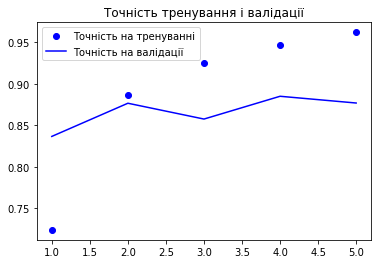

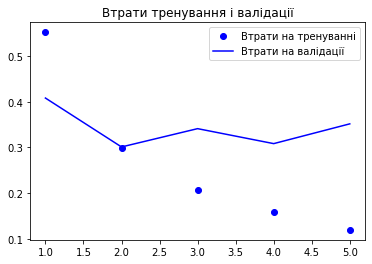

In [10]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_accuracy, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [11]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Accuracy: {:.2f}%'.format(test_acc * 100))

782/782 [==============================] - 25s 31ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 25s 32ms/step - loss: 0.3865 - accuracy: 0.8656
Test Accuracy: 86.56%


Висновок: Час виконання 5-ти епох - 10 хв. 14 сек. Точність склала 86.6%